In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../data/crawler/unified-events-statistics.csv')
def qtd_eventos(integer):
    return 45 - integer

qtd_eventos = list(map(qtd_eventos, df.isnull().sum(axis=1).tolist()))
df['qtd_eventos'] = qtd_eventos

In [3]:
df = df.drop(['golId','game','event6','event7','event8','event9','event10','event11','event12','event13','event14','event15','event16','event17','event18','event19','event20','event21','event22','event23','event24','event25','event26','event27','event28','event29','event30','event31','event32','event33','event34','event35','event36','event37','event38','event39','event40','event41','event42','event43','event44','event45'],axis=1)
y = df.result
df = df.replace(['BLUE: first_blood',
    'BLUE: dragon',
    'BLUE: herald',
    'BLUE: first_tower_top',
    'BLUE: first_tower_mid',
    'BLUE: first_tower_bot',
    'BLUE: second_tower_top',
    'BLUE: second_tower_mid',
    'BLUE: second_tower_bot',
    'BLUE: third_tower_top',
    'BLUE: third_tower_mid',
    'BLUE: third_tower_bot',
    'BLUE: inhibitor_top',
    'BLUE: inhibitor_mid',
    'BLUE: inhibitor_bot',
    'BLUE: baron',
    'BLUE: elder_dragon',
    'BLUE: nexus_tower',
    'BLUE: nexus',
    'RED: first_blood',
    'RED: dragon',
    'RED: herald',
    'RED: first_tower_top',
    'RED: first_tower_mid',
    'RED: first_tower_bot',
    'RED: second_tower_top',
    'RED: second_tower_mid',
    'RED: second_tower_bot',
    'RED: third_tower_top',
    'RED: third_tower_mid',
    'RED: third_tower_bot',
    'RED: inhibitor_top',
    'RED: inhibitor_mid',
    'RED: inhibitor_bot',
    'RED: baron',
    'RED: elder_dragon',
    'RED: nexus_tower',
    'RED: nexus'], range(38))
x = df.drop(['result'],axis=1)
df.head()

,event1,event2,event3,event4,event5,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,...,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos
0,19,1,2,1,3,1,1.00,2.0,1,1.0,...,0.6,4.0,0,0.00,0.0,0,0.0,0.0,1,28
1,19,21,1,22,25,1,0.00,3.0,2,0.0,...,0.5,3.5,11,0.73,4.2,3,1.0,6.2,0,20
2,19,2,20,24,2,0,0.00,0.0,1,1.0,...,1.0,20.0,0,0.00,0.0,5,0.6,3.2,0,31
3,20,0,21,20,21,7,0.71,4.1,2,0.5,...,0.5,3.5,5,0.80,9.1,0,0.0,0.0,0,25
4,19,1,2,1,2,1,1.00,2.0,2,1.0,...,0.4,2.4,2,1.00,24.0,0,0.0,0.0,0,23


In [4]:
df.describe()

,event1,event2,event3,event4,event5,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,...,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos
count,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,...,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000
mean,10.101776,11.016487,10.898859,11.778694,12.297717,2.889981,0.429990,3.156024,3.223209,0.445279,...,0.405536,4.116994,3.388713,0.423072,4.849937,3.068167,0.418221,3.501554,0.519658,24.133798
std,9.530966,9.462717,9.439287,9.453838,9.663108,3.896245,0.399016,3.894661,3.729043,0.393140,...,0.413358,5.312911,4.548203,0.388002,5.777125,4.812974,0.397341,4.654709,0.499693,3.953405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,0.000000,1.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.425000,0.000000,0.000000,0.000000,0.000000,21.000000
50%,19.000000,19.000000,4.000000,19.000000,5.000000,2.000000,0.500000,2.300000,2.000000,0.500000,...,0.330000,2.800000,2.000000,0.500000,3.600000,2.000000,0.440000,2.300000,1.000000,24.000000
75%,19.000000,20.000000,21.000000,20.000000,22.000000,4.000000,0.800000,4.300000,5.000000,0.780000,...,0.800000,5.700000,5.000000,0.750000,6.300000,4.000000,0.750000,4.500000,1.000000,26.000000
max,21.000000,22.000000,24.000000,25.000000,27.000000,52.000000,1.000000,74.000000,33.000000,1.000000,...,1.000000,47.000000,62.000000,1.000000,58.000000,94.000000,1.000000,50.000000,1.000000,41.000000


# of red team victory:  1639
# of blue team victory:  1515


c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



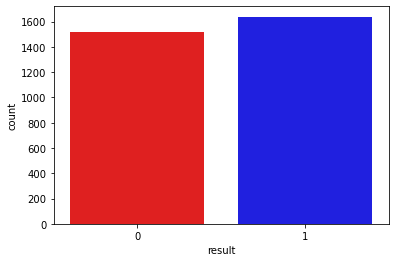

In [5]:
ax = sns.countplot(y,palette=['red','blue'])
R, B = y.value_counts()
print('# of red team victory: ', R)
print('# of blue team victory: ', B)

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



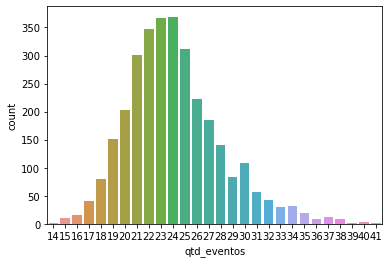

In [6]:
ax = sns.countplot(df['qtd_eventos'])

<AxesSubplot:>

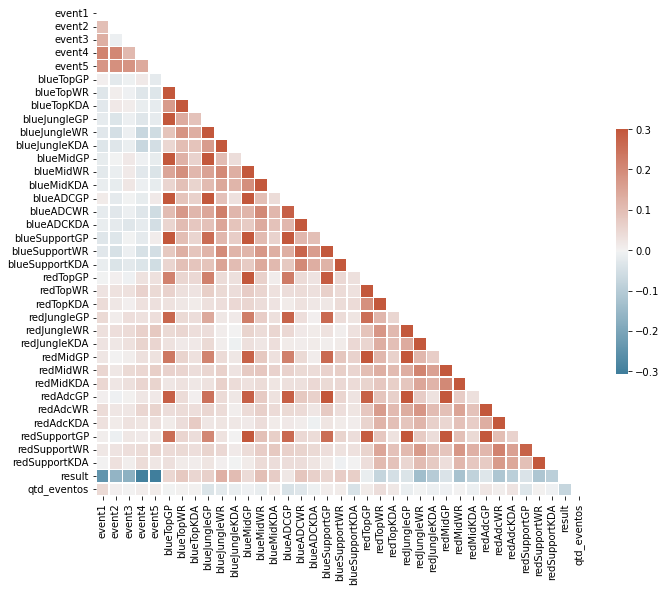

In [7]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 0.98, 'Relação entre qtd de eventos e vencedor')

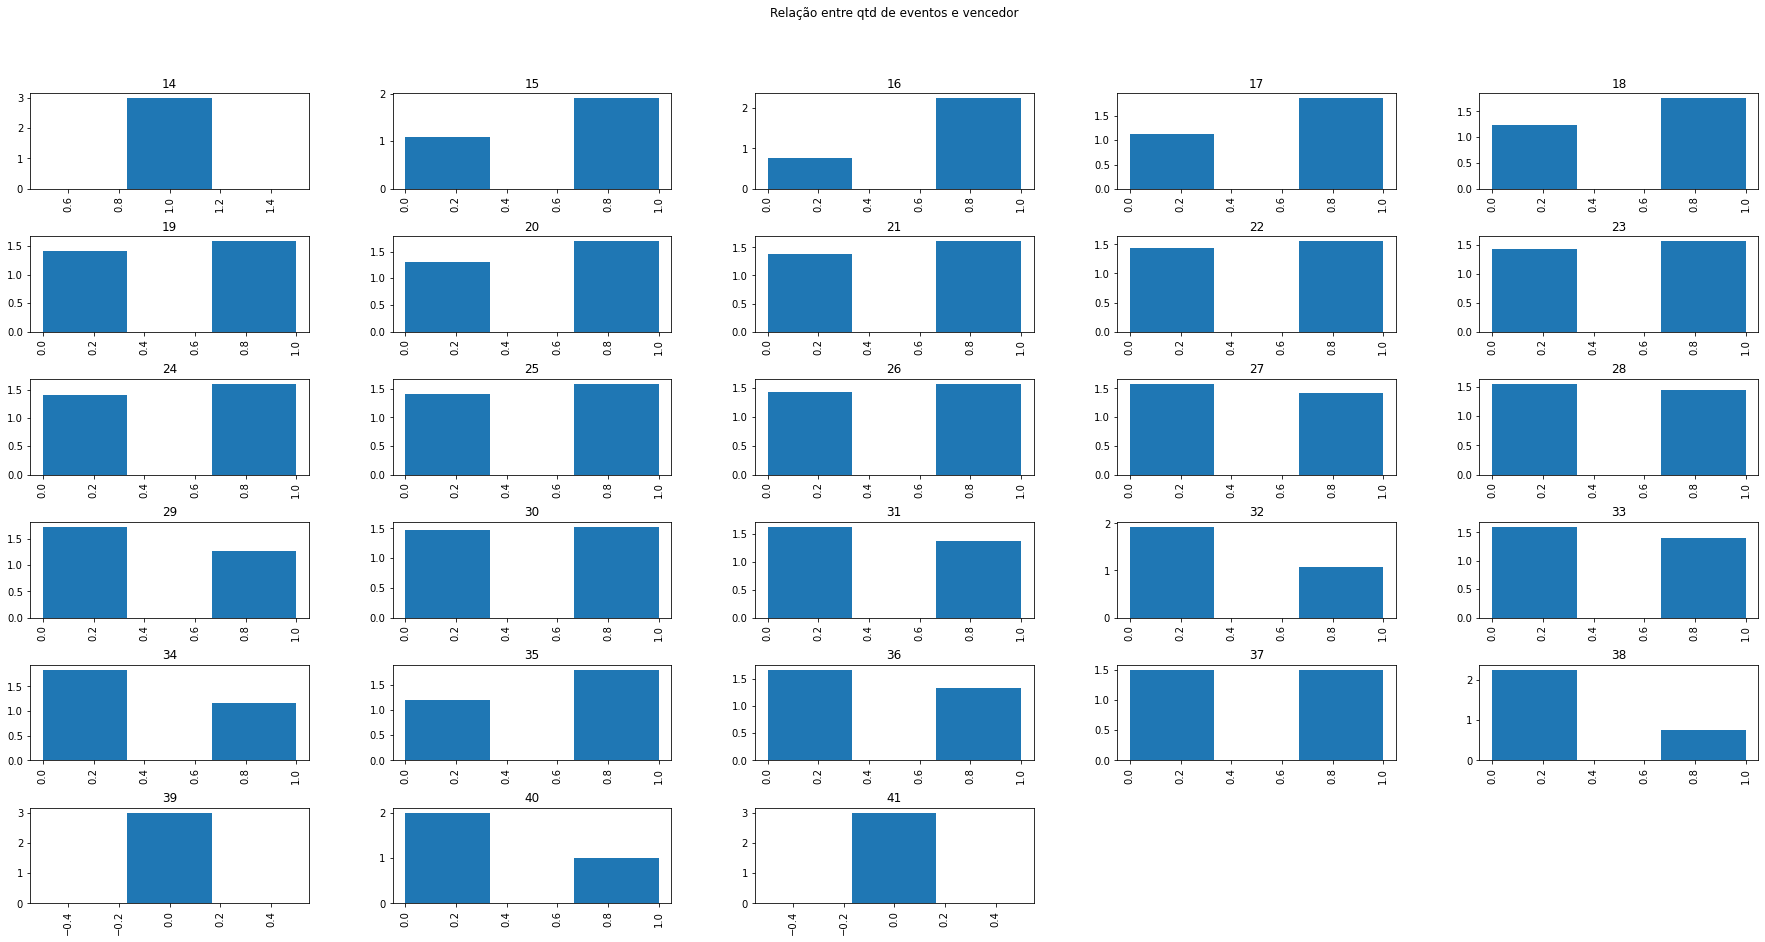

In [8]:
df.hist(column='result', by='qtd_eventos', bins=3,figsize=(30,15),density=1)
plt.suptitle('Relação entre qtd de eventos e vencedor')

In [9]:
features = ['event1','event2','event3', 'event4', 'event5', 'blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['result'])
fig.show()

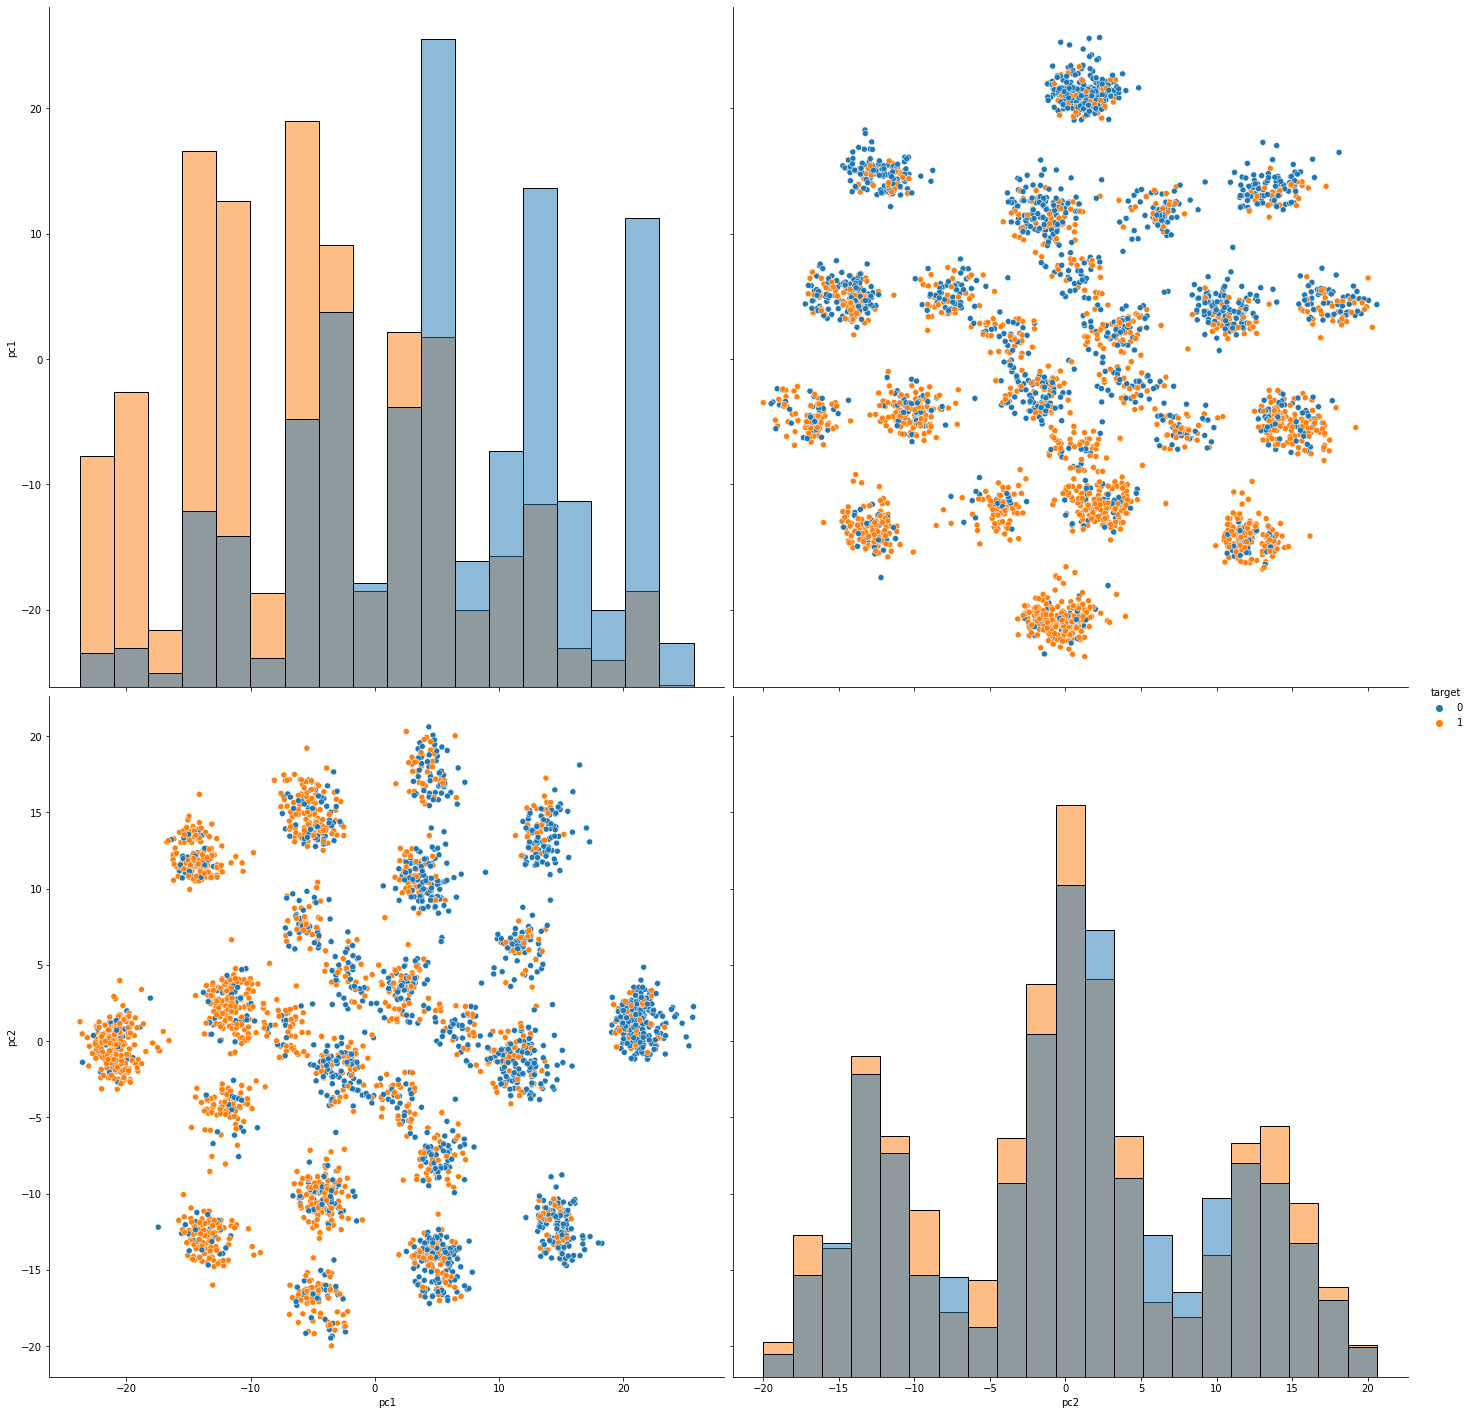

In [10]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
new_df = pd.DataFrame(X_transformed, columns=['pc1', 'pc2'])
new_df['target'] = df['result']
sns.pairplot(new_df, vars=['pc1', 'pc2'],hue='target', diag_kind='hist',height=10)
plt.show()

In [11]:
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline


pca = Pipeline([("standarize", StandardScaler()), ("pca",PCA(n_components = 3)), ("dataframe", FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["First Comp", "Second Comp", "Third Comp"])))]).fit(X)
X3D = pca.transform(X)
px.scatter_3d(x = "First Comp", y = "Second Comp",z = "Third Comp", data_frame= X3D, color= y)

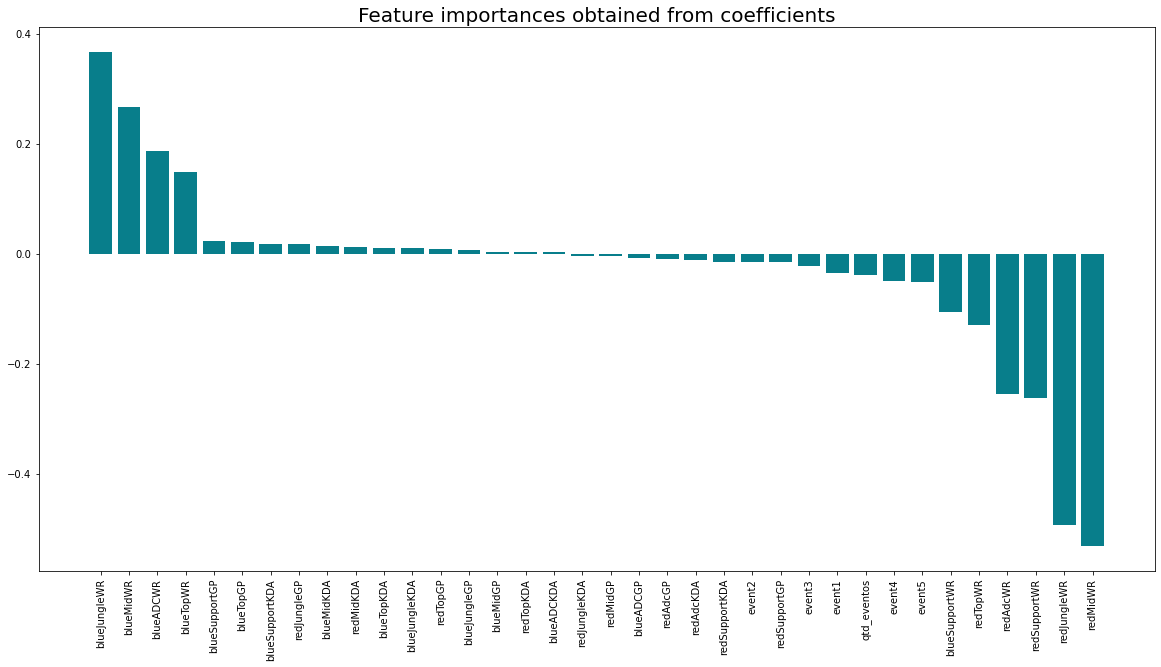

In [12]:
# Fonte dos plots abaixo: https://betterdatascience.com/feature-importance-python/
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=50000)
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.rcParams["figure.figsize"] = (20, 10)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

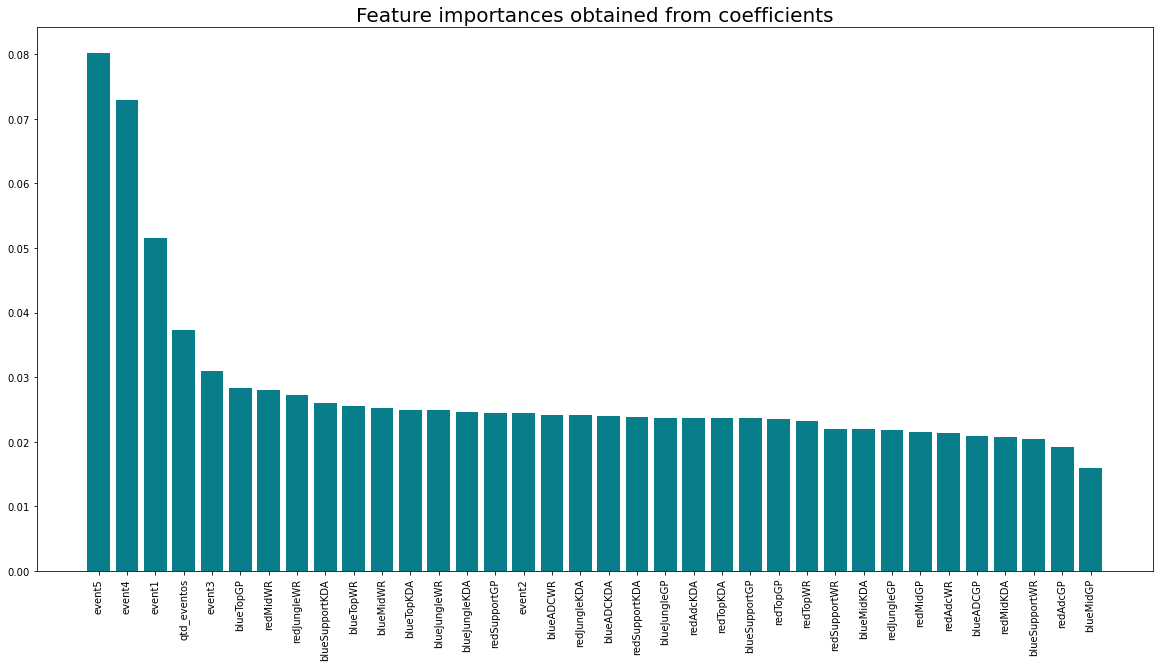

In [13]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

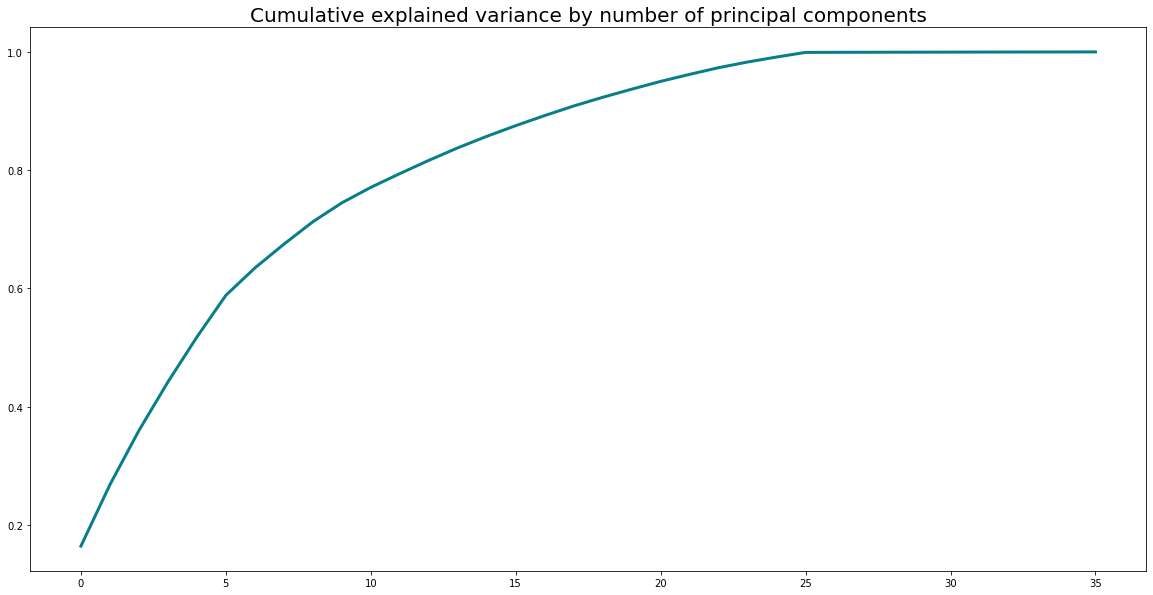

In [14]:
from sklearn.decomposition import PCA

pca = PCA().fit(x)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [15]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(x.columns) + 1)],
    index=x.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
event1,5.662377,1.322633,-5.065903,5.106695,-0.816787,2.137468,0.006236,-0.104178,0.102823,-0.071907,...,-0.000095,0.000058,-0.000005,0.000103,-0.000012,0.000196,0.000136,-0.000010,0.000110,-0.000021
event2,4.763681,-6.172040,2.702020,-1.246626,-0.806774,4.385076,-0.073895,-0.073189,0.000237,0.006252,...,0.000042,0.000077,0.000122,-0.000082,0.000099,-0.000090,-0.000138,0.000020,0.000042,0.000049
event3,4.073288,6.698184,1.130553,-4.165252,-1.204129,2.738374,-0.024220,-0.151850,-0.189515,-0.019532,...,0.000338,0.000151,-0.000060,0.000018,-0.000199,-0.000026,-0.000079,0.000004,-0.000194,0.000133
event4,5.774999,-2.279627,-4.038866,-4.306559,0.980831,-3.848606,0.237349,-0.177296,0.090774,-0.167003,...,-0.000145,0.000373,0.000009,-0.000087,-0.000227,-0.000241,0.000021,0.000066,0.000106,-0.000014
event5,6.265903,1.224755,5.499432,3.008764,1.039966,-3.445910,0.526668,-0.162625,0.033861,-0.169813,...,-0.000048,0.000663,0.000060,0.000037,0.000087,0.000002,-0.000065,0.000039,0.000083,-0.000099


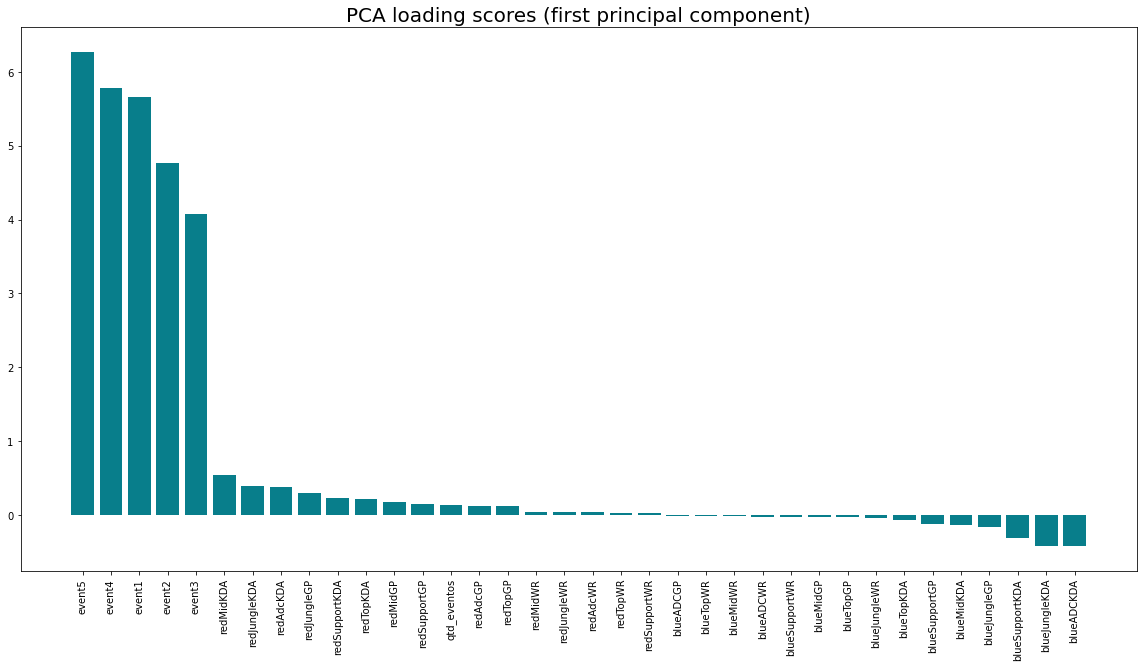

In [16]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3154 samples in 0.001s...
[t-SNE] Computed neighbors for 3154 samples in 0.312s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3154
[t-SNE] Computed conditional probabilities for sample 2000 / 3154
[t-SNE] Computed conditional probabilities for sample 3000 / 3154
[t-SNE] Computed conditional probabilities for sample 3154 / 3154
[t-SNE] Mean sigma: 6.867014
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.494255
[t-SNE] KL divergence after 300 iterations: 1.308824
